# Projeto 19: Geração de novas imagens com GANs

In [1]:
!pip install torch==1.4.0 torchvision==0.5.0

     |████████████████████████████████| 753.4MB 21kB/s 
     |████████████████████████████████| 4.0MB 47.7MB/s 
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101
  Found existing installation: torchvision 0.8.1+cu101
    Uninstalling torchvision-0.8.1+cu101:
      Successfully uninstalled torchvision-0.8.1+cu101


## Etapa 1: Importação das bibliotecas

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms

from torch import optim
from torchvision import datasets

In [3]:
torch.manual_seed(123)

## Etapa 2: Base de dados

In [4]:
transform = transforms.ToTensor()
train = datasets.MNIST(root='.', train = True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train, batch_size=256)

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw




Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...
Done!


## Etapa 3: Construção do modelo

In [5]:
class gerador(nn.Module):
  def __init__(self):
    super().__init__()

    # 100 -> 32 -> 64 -> 128 -> 784
    self.dense0 = nn.Linear(100, 32)
    self.dense1 = nn.Linear(32, 64)
    self.dense2 = nn.Linear(64, 128)
    self.dense3 = nn.Linear(128, 784)
    self.dropout = nn.Dropout(0.3)

  def forward(self, X):
    X = self.dropout(F.leaky_relu(self.dense0(X), 0.2))
    X = self.dropout(F.leaky_relu(self.dense1(X), 0.2))
    X = self.dropout(F.leaky_relu(self.dense2(X), 0.2))
    X = torch.tanh(self.dense3(X))
    X = X.view(X.shape[0], 28, 28)
    return X

## Etapa 4: Construção do discriminador

In [6]:
class discriminador(nn.Module):
  def __init__(self):
    super().__init__()

    # 784 -> 128 -> 64 -> 32 -> 1
    self.dense0 = nn.Linear(784,128)
    self.dense1 = nn.Linear(128,64)
    self.dense2 = nn.Linear(64,32)
    self.dense3 = nn.Linear(32,1)
    self.dropout = nn.Dropout(0.3)

  def forward(self, X):
    X = X.view(X.shape[0], 28*28)
    X = self.dropout(F.leaky_relu(self.dense0(X), 0.2))
    X = self.dropout(F.leaky_relu(self.dense1(X), 0.2))
    X = self.dropout(F.leaky_relu(self.dense2(X), 0.2))
    X = self.dense3(X)
    return X

## Etapa 5: Criação dos objetos

In [17]:
G = gerador()
G_optim = optim.Adam(G.parameters(), lr=0.002)

D = discriminador()
D_optim = optim.Adam(D.parameters(), lr=0.002)

criterion = nn.BCEWithLogitsLoss()

In [18]:
device = torch.device('cuda') if torch.cuda.is_available else torch.device('cpu')
device

device(type='cuda')

In [19]:
G.to(device)

gerador(
  (dense0): Linear(in_features=100, out_features=32, bias=True)
  (dense1): Linear(in_features=32, out_features=64, bias=True)
  (dense2): Linear(in_features=64, out_features=128, bias=True)
  (dense3): Linear(in_features=128, out_features=784, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)

In [20]:
D.to(device)

discriminador(
  (dense0): Linear(in_features=784, out_features=128, bias=True)
  (dense1): Linear(in_features=128, out_features=64, bias=True)
  (dense2): Linear(in_features=64, out_features=32, bias=True)
  (dense3): Linear(in_features=32, out_features=1, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)

## Etapa 6: Treinamento do modelo

ÉPOCA 001 FINALIZADA: custo discriminador 0.670708 | custo gerador 4.476513


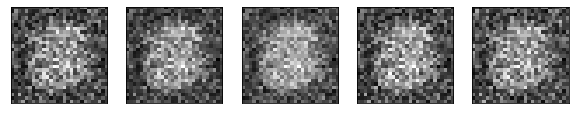

ÉPOCA 002 FINALIZADA: custo discriminador 0.859675 | custo gerador 4.959257


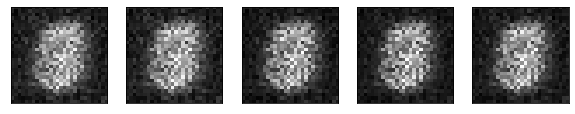

ÉPOCA 003 FINALIZADA: custo discriminador 1.027193 | custo gerador 3.532353


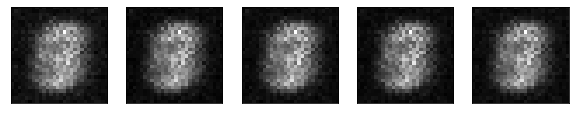

ÉPOCA 004 FINALIZADA: custo discriminador 1.083944 | custo gerador 2.219941


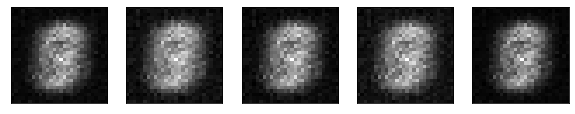

ÉPOCA 005 FINALIZADA: custo discriminador 1.105777 | custo gerador 2.082806


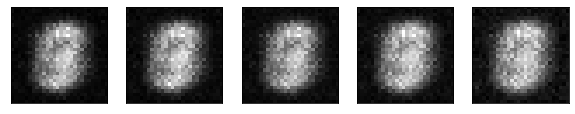

ÉPOCA 006 FINALIZADA: custo discriminador 1.180940 | custo gerador 1.728108


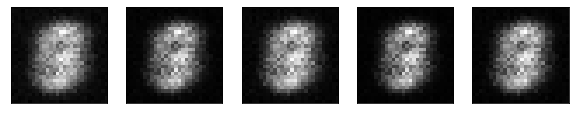

ÉPOCA 007 FINALIZADA: custo discriminador 1.281840 | custo gerador 1.183047


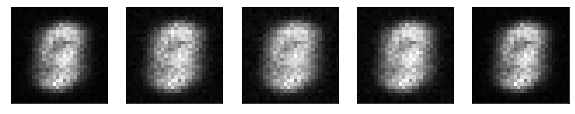

ÉPOCA 008 FINALIZADA: custo discriminador 1.267657 | custo gerador 1.155092


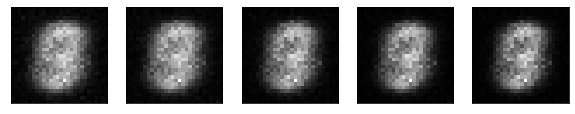

ÉPOCA 009 FINALIZADA: custo discriminador 1.136070 | custo gerador 1.894412


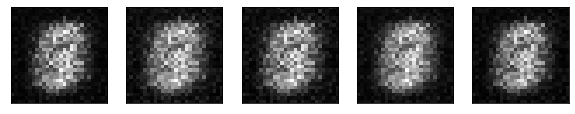

ÉPOCA 010 FINALIZADA: custo discriminador 1.112132 | custo gerador 1.304014


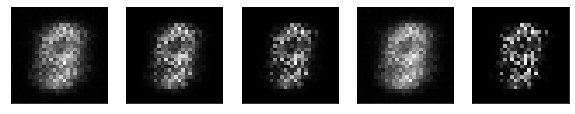

ÉPOCA 011 FINALIZADA: custo discriminador 0.952343 | custo gerador 1.821415


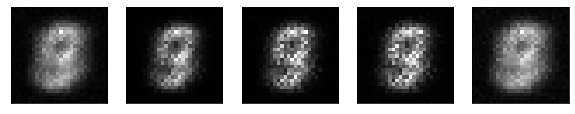

ÉPOCA 012 FINALIZADA: custo discriminador 0.901670 | custo gerador 2.025168


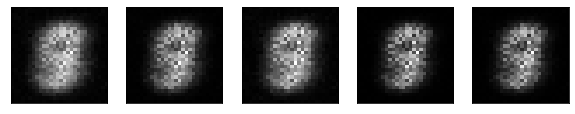

ÉPOCA 013 FINALIZADA: custo discriminador 0.883779 | custo gerador 2.484343


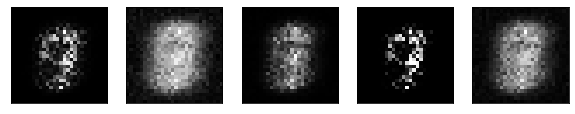

ÉPOCA 014 FINALIZADA: custo discriminador 0.876515 | custo gerador 2.236655


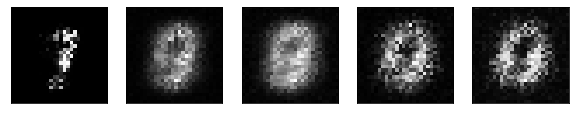

ÉPOCA 015 FINALIZADA: custo discriminador 0.900103 | custo gerador 2.221165


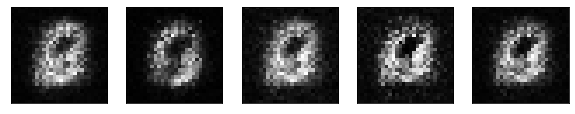

ÉPOCA 016 FINALIZADA: custo discriminador 0.945205 | custo gerador 2.062534


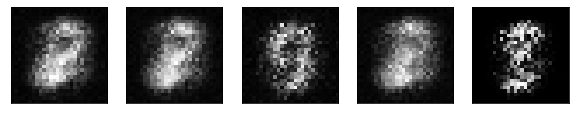

ÉPOCA 017 FINALIZADA: custo discriminador 0.987051 | custo gerador 2.034454


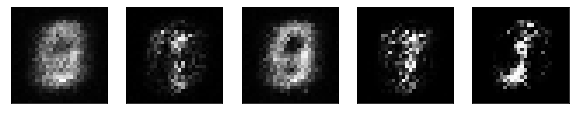

ÉPOCA 018 FINALIZADA: custo discriminador 0.946258 | custo gerador 2.165785


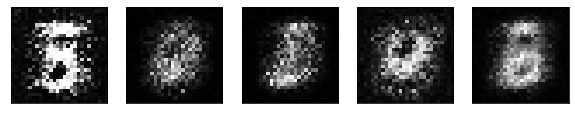

ÉPOCA 019 FINALIZADA: custo discriminador 0.971969 | custo gerador 2.069644


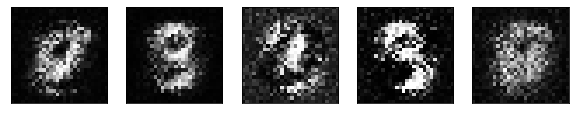

ÉPOCA 020 FINALIZADA: custo discriminador 0.993189 | custo gerador 2.023658


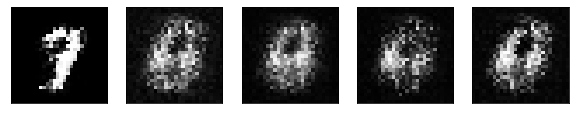

ÉPOCA 021 FINALIZADA: custo discriminador 1.014720 | custo gerador 2.064153


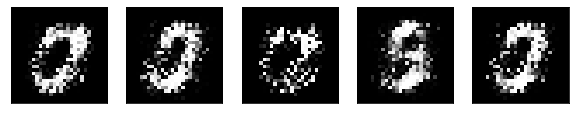

ÉPOCA 022 FINALIZADA: custo discriminador 1.019476 | custo gerador 2.242850


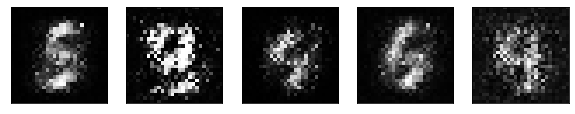

ÉPOCA 023 FINALIZADA: custo discriminador 1.050994 | custo gerador 1.824360


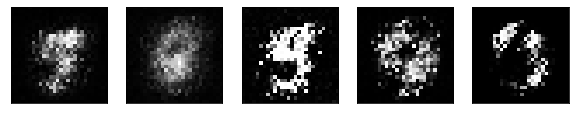

ÉPOCA 024 FINALIZADA: custo discriminador 1.016477 | custo gerador 2.014187


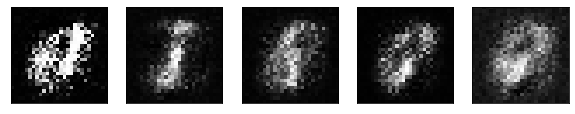

ÉPOCA 025 FINALIZADA: custo discriminador 1.076160 | custo gerador 1.899356


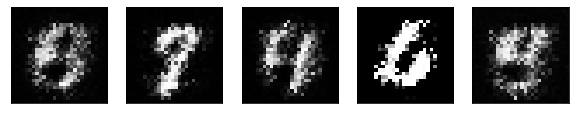

ÉPOCA 026 FINALIZADA: custo discriminador 1.135204 | custo gerador 1.618425


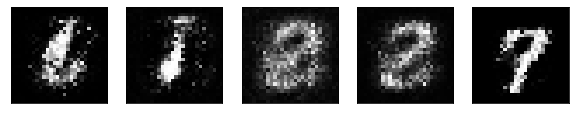

ÉPOCA 027 FINALIZADA: custo discriminador 1.057101 | custo gerador 1.783903


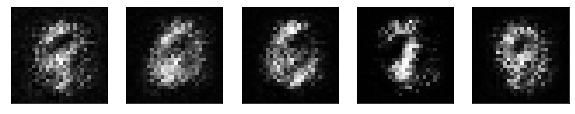

ÉPOCA 028 FINALIZADA: custo discriminador 1.075492 | custo gerador 1.765510


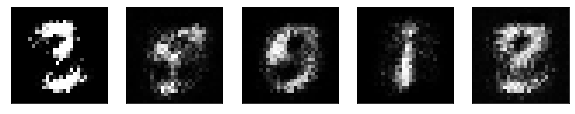

ÉPOCA 029 FINALIZADA: custo discriminador 1.102608 | custo gerador 1.655398


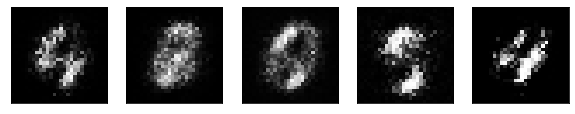

ÉPOCA 030 FINALIZADA: custo discriminador 1.190107 | custo gerador 1.379938


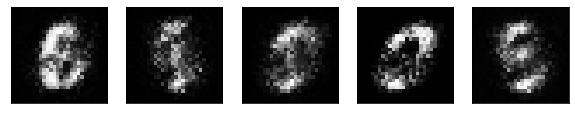

ÉPOCA 031 FINALIZADA: custo discriminador 1.124322 | custo gerador 1.506742


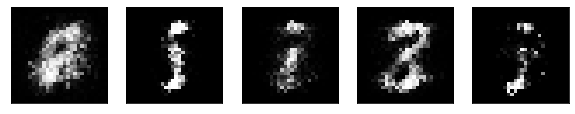

ÉPOCA 032 FINALIZADA: custo discriminador 1.168824 | custo gerador 1.388292


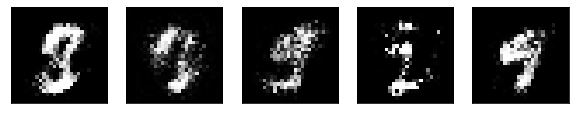

ÉPOCA 033 FINALIZADA: custo discriminador 1.193093 | custo gerador 1.312941


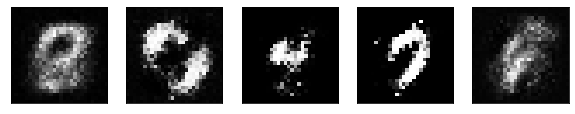

ÉPOCA 034 FINALIZADA: custo discriminador 1.192489 | custo gerador 1.255382


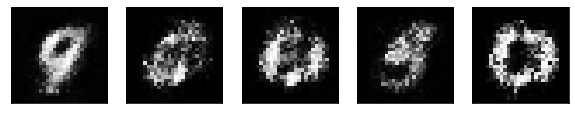

ÉPOCA 035 FINALIZADA: custo discriminador 1.188428 | custo gerador 1.283708


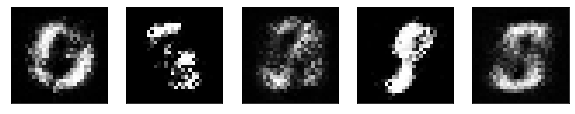

ÉPOCA 036 FINALIZADA: custo discriminador 1.203740 | custo gerador 1.274498


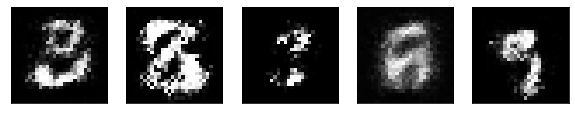

ÉPOCA 037 FINALIZADA: custo discriminador 1.229381 | custo gerador 1.162300


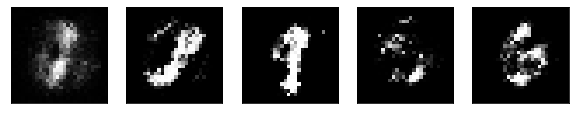

ÉPOCA 038 FINALIZADA: custo discriminador 1.212101 | custo gerador 1.215648


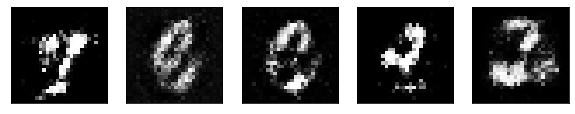

ÉPOCA 039 FINALIZADA: custo discriminador 1.245921 | custo gerador 1.153612


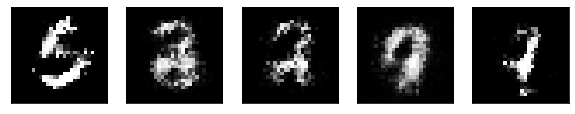

ÉPOCA 040 FINALIZADA: custo discriminador 1.249894 | custo gerador 1.134361


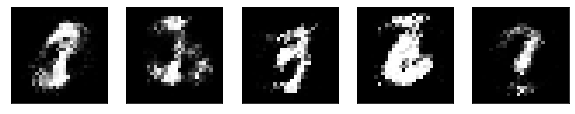

ÉPOCA 041 FINALIZADA: custo discriminador 1.269520 | custo gerador 1.070116


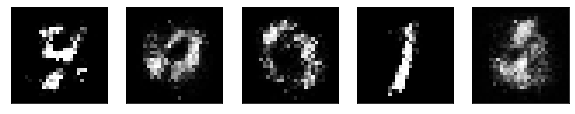

ÉPOCA 042 FINALIZADA: custo discriminador 1.239857 | custo gerador 1.154522


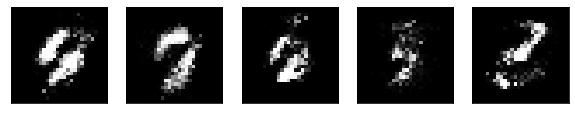

ÉPOCA 043 FINALIZADA: custo discriminador 1.268781 | custo gerador 1.081602


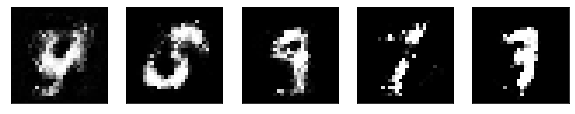

ÉPOCA 044 FINALIZADA: custo discriminador 1.269983 | custo gerador 1.046772


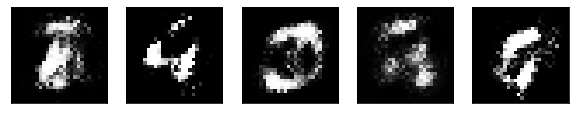

ÉPOCA 045 FINALIZADA: custo discriminador 1.253354 | custo gerador 1.136208


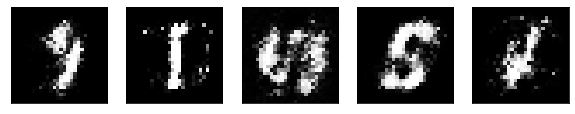

ÉPOCA 046 FINALIZADA: custo discriminador 1.241568 | custo gerador 1.141058


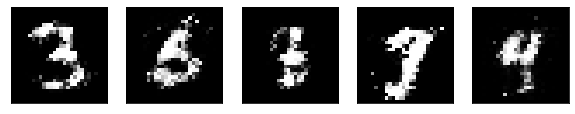

ÉPOCA 047 FINALIZADA: custo discriminador 1.277725 | custo gerador 1.081426


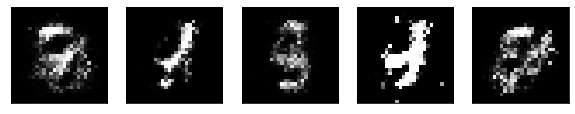

ÉPOCA 048 FINALIZADA: custo discriminador 1.252290 | custo gerador 1.097267


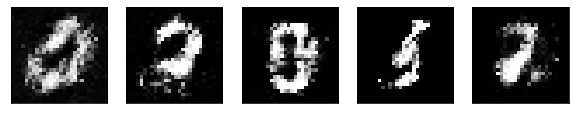

ÉPOCA 049 FINALIZADA: custo discriminador 1.257226 | custo gerador 1.111243


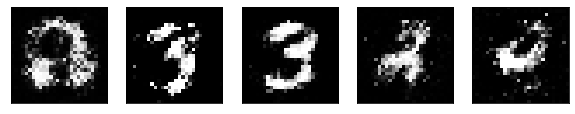

ÉPOCA 050 FINALIZADA: custo discriminador 1.270379 | custo gerador 1.065698


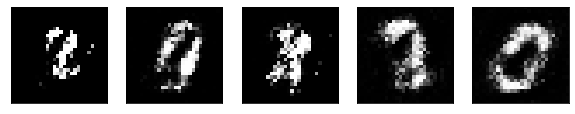

ÉPOCA 051 FINALIZADA: custo discriminador 1.278013 | custo gerador 1.050716


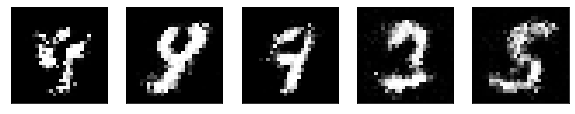

ÉPOCA 052 FINALIZADA: custo discriminador 1.261040 | custo gerador 1.106441


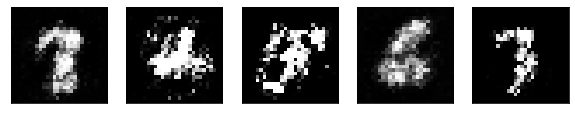

ÉPOCA 053 FINALIZADA: custo discriminador 1.261836 | custo gerador 1.082825


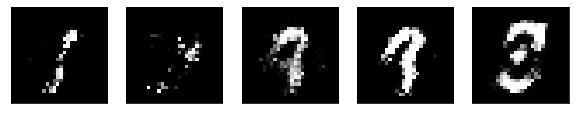

ÉPOCA 054 FINALIZADA: custo discriminador 1.266440 | custo gerador 1.073319


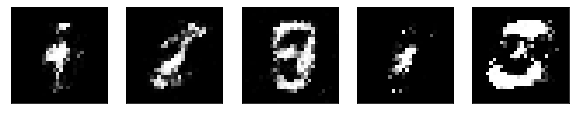

ÉPOCA 055 FINALIZADA: custo discriminador 1.257216 | custo gerador 1.105637


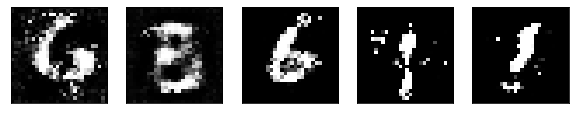

ÉPOCA 056 FINALIZADA: custo discriminador 1.263749 | custo gerador 1.068226


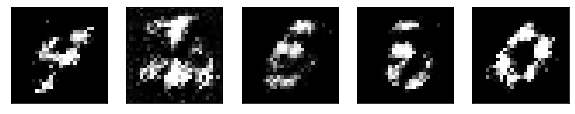

ÉPOCA 057 FINALIZADA: custo discriminador 1.269641 | custo gerador 1.067004


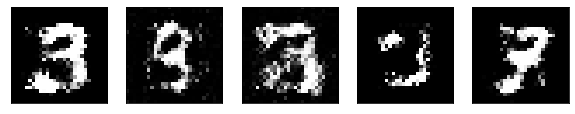

ÉPOCA 058 FINALIZADA: custo discriminador 1.263465 | custo gerador 1.064740


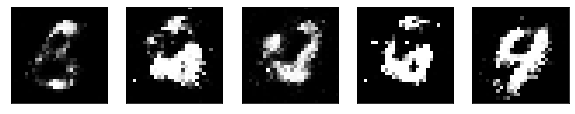

ÉPOCA 059 FINALIZADA: custo discriminador 1.245437 | custo gerador 1.125940


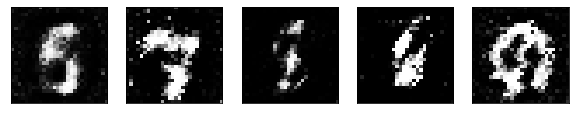

ÉPOCA 060 FINALIZADA: custo discriminador 1.241402 | custo gerador 1.135171


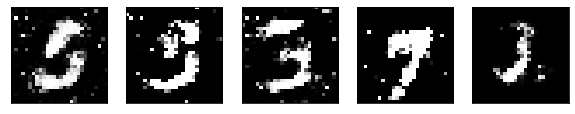

ÉPOCA 061 FINALIZADA: custo discriminador 1.246154 | custo gerador 1.167358


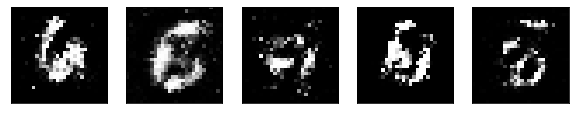

ÉPOCA 062 FINALIZADA: custo discriminador 1.247498 | custo gerador 1.174322


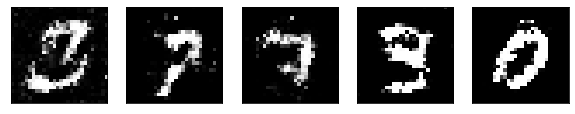

ÉPOCA 063 FINALIZADA: custo discriminador 1.237582 | custo gerador 1.183641


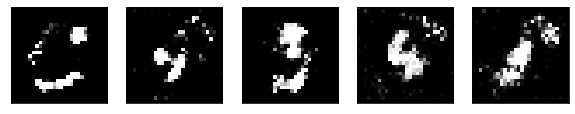

ÉPOCA 064 FINALIZADA: custo discriminador 1.226607 | custo gerador 1.179450


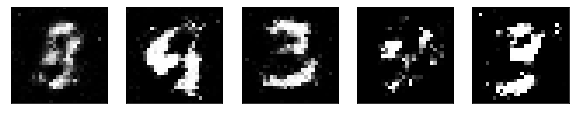

ÉPOCA 065 FINALIZADA: custo discriminador 1.222863 | custo gerador 1.210681


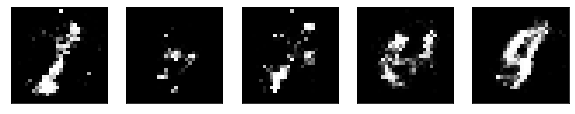

ÉPOCA 066 FINALIZADA: custo discriminador 1.230166 | custo gerador 1.169198


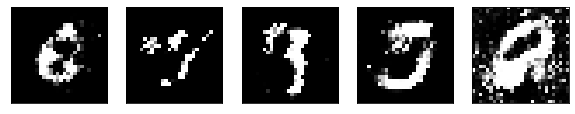

ÉPOCA 067 FINALIZADA: custo discriminador 1.230062 | custo gerador 1.164261


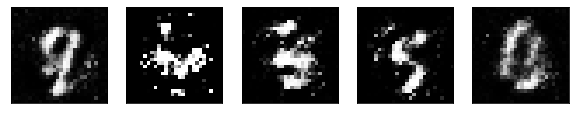

ÉPOCA 068 FINALIZADA: custo discriminador 1.237418 | custo gerador 1.135919


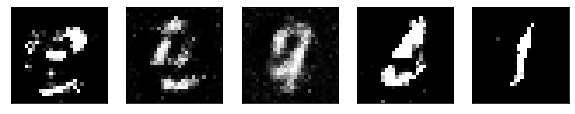

ÉPOCA 069 FINALIZADA: custo discriminador 1.222204 | custo gerador 1.183470


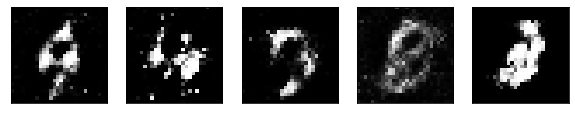

ÉPOCA 070 FINALIZADA: custo discriminador 1.249549 | custo gerador 1.111330


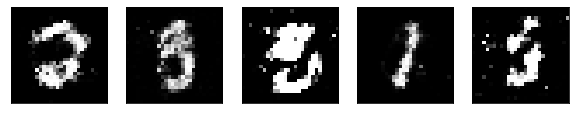

ÉPOCA 071 FINALIZADA: custo discriminador 1.237215 | custo gerador 1.161911


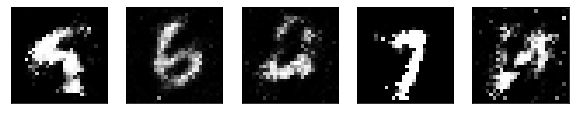

ÉPOCA 072 FINALIZADA: custo discriminador 1.227284 | custo gerador 1.195790


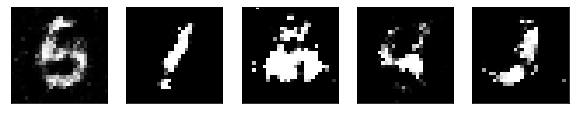

ÉPOCA 073 FINALIZADA: custo discriminador 1.241123 | custo gerador 1.153027


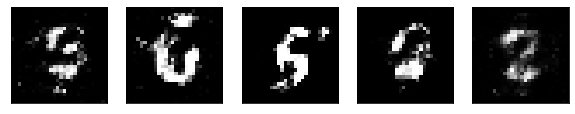

ÉPOCA 074 FINALIZADA: custo discriminador 1.234289 | custo gerador 1.146159


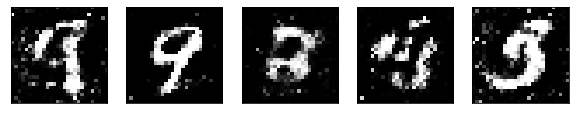

ÉPOCA 075 FINALIZADA: custo discriminador 1.266306 | custo gerador 1.087067


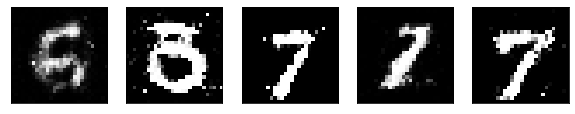

ÉPOCA 076 FINALIZADA: custo discriminador 1.259730 | custo gerador 1.107520


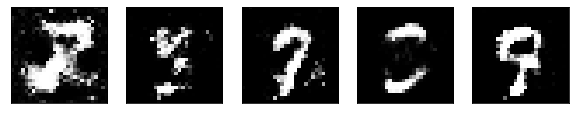

ÉPOCA 077 FINALIZADA: custo discriminador 1.261611 | custo gerador 1.084346


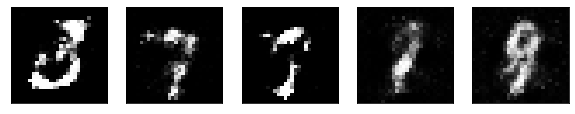

ÉPOCA 078 FINALIZADA: custo discriminador 1.256804 | custo gerador 1.110628


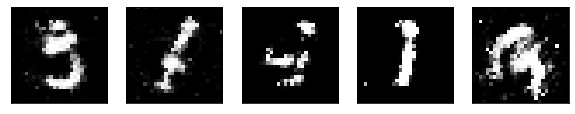

ÉPOCA 079 FINALIZADA: custo discriminador 1.264848 | custo gerador 1.068356


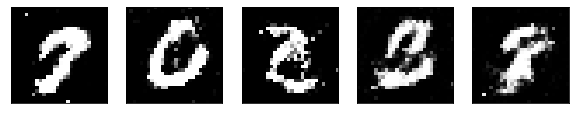

ÉPOCA 080 FINALIZADA: custo discriminador 1.269232 | custo gerador 1.070976


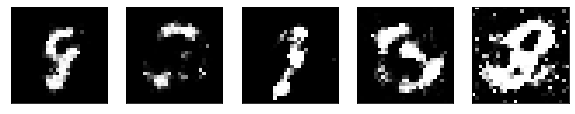

ÉPOCA 081 FINALIZADA: custo discriminador 1.250338 | custo gerador 1.110119


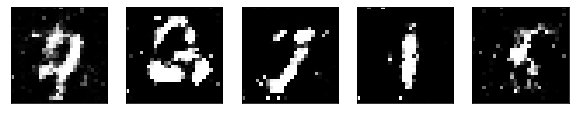

ÉPOCA 082 FINALIZADA: custo discriminador 1.253873 | custo gerador 1.088812


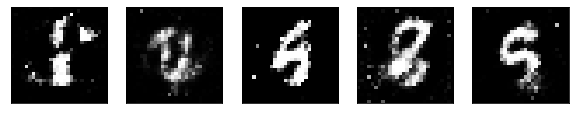

ÉPOCA 083 FINALIZADA: custo discriminador 1.267672 | custo gerador 1.105550


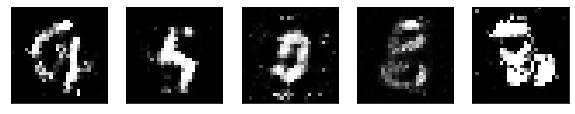

ÉPOCA 084 FINALIZADA: custo discriminador 1.261085 | custo gerador 1.113970


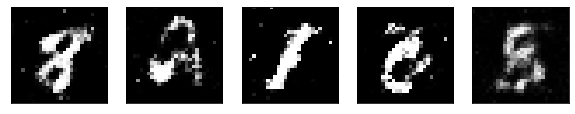

ÉPOCA 085 FINALIZADA: custo discriminador 1.251941 | custo gerador 1.124322


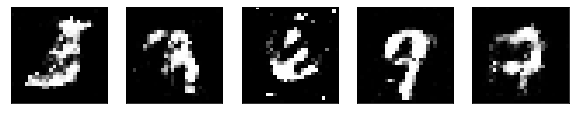

ÉPOCA 086 FINALIZADA: custo discriminador 1.258175 | custo gerador 1.088553


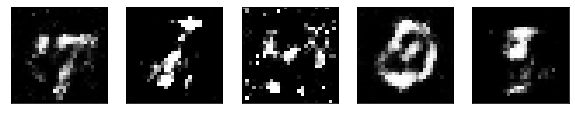

ÉPOCA 087 FINALIZADA: custo discriminador 1.275645 | custo gerador 1.045689


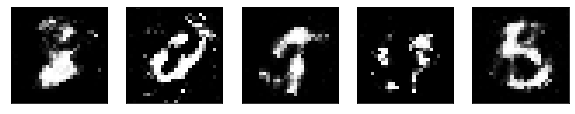

ÉPOCA 088 FINALIZADA: custo discriminador 1.274835 | custo gerador 1.049396


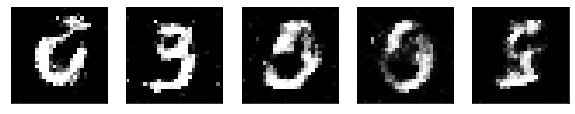

ÉPOCA 089 FINALIZADA: custo discriminador 1.272915 | custo gerador 1.064247


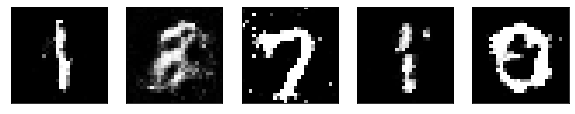

ÉPOCA 090 FINALIZADA: custo discriminador 1.275866 | custo gerador 1.075865


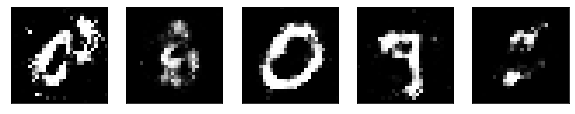

ÉPOCA 091 FINALIZADA: custo discriminador 1.258562 | custo gerador 1.090433


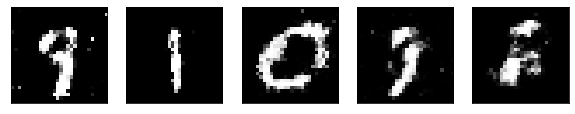

ÉPOCA 092 FINALIZADA: custo discriminador 1.261819 | custo gerador 1.096184


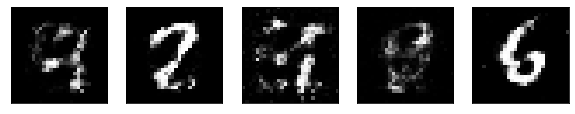

ÉPOCA 093 FINALIZADA: custo discriminador 1.262375 | custo gerador 1.101711


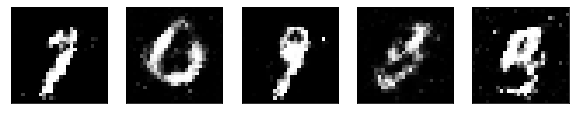

ÉPOCA 094 FINALIZADA: custo discriminador 1.259345 | custo gerador 1.082288


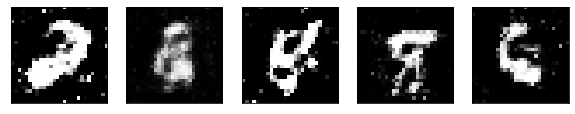

ÉPOCA 095 FINALIZADA: custo discriminador 1.254925 | custo gerador 1.108827


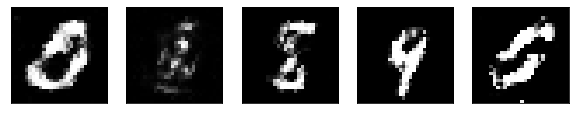

ÉPOCA 096 FINALIZADA: custo discriminador 1.275918 | custo gerador 1.076041


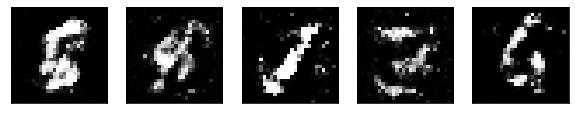

ÉPOCA 097 FINALIZADA: custo discriminador 1.278229 | custo gerador 1.068718


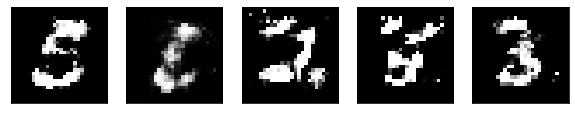

ÉPOCA 098 FINALIZADA: custo discriminador 1.270977 | custo gerador 1.083483


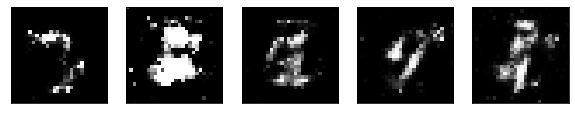

ÉPOCA 099 FINALIZADA: custo discriminador 1.260359 | custo gerador 1.143161


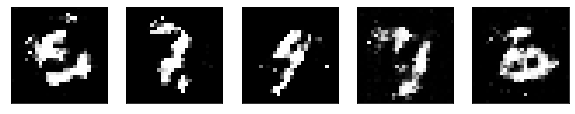

ÉPOCA 100 FINALIZADA: custo discriminador 1.257976 | custo gerador 1.110606


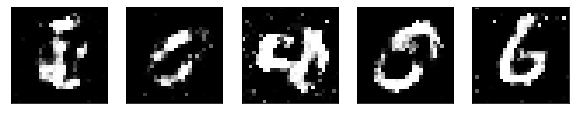

In [21]:
for epoch in range(100):
  D_run_loss = 0
  G_run_loss = 0

  for i, (img_raw, _) in enumerate(train_loader):
    
    batch_size = img_raw.size(0)
    img_raw = img_raw * 2 - 1
    img_raw = img_raw.to(device)

    # TREINAMENTO GERADOR
    G_optim.zero_grad()
    ruido = np.random.uniform(low=-1., high=1., size=(batch_size, 100))
    ruido = torch.from_numpy(ruido).float().to(device)
    
    img_gen = G.forward(ruido)
    outputs_gen = D.forward(img_gen)
    labels_gen = torch.ones(batch_size).to(device)
    
    G_loss = criterion(outputs_gen.view(*labels_gen.shape), labels_gen)
    G_loss.backward()
    G_optim.step()

    # TREINAMENTO DISCRIMINADOR
    D_optim.zero_grad()
    outputs_raw = D.forward(img_raw)
    labels_raw = (torch.ones(batch_size) * 0.9).to(device)
    D_loss_raw = criterion(outputs_raw.view(*labels_raw.shape), labels_raw)

    ruido = np.random.uniform(-1., 1., (batch_size, 100))
    ruido = torch.from_numpy(ruido).float().to(device)
    img_gen = G.forward(ruido)
    outputs_gen = D.forward(img_gen)
    labels_gen = torch.zeros(batch_size).to(device)
    D_loss_gen = criterion(outputs_gen.view(*labels_gen.shape), labels_gen)

    D_loss = D_loss_raw + D_loss_gen
    D_loss.backward()
    D_optim.step()

    D_run_loss += D_loss.item()
    G_run_loss += G_loss.item()

    print('\rÉpoca {:03d} - Loop {:3d} de {:3d}: custo discriminador {:03.5f} | custo gerador {:03.5f}' \
          .format(epoch+1, i+1, len(train_loader), D_loss.item(), G_loss.item()), end='\r')
    
  D_run_loss /= len(train_loader)
  G_run_loss /= len(train_loader)
  print('ÉPOCA {:03d} FINALIZADA: custo discriminador {:03.6f} | custo gerador {:03.6f}' \
        .format(epoch+1, D_run_loss, G_run_loss))
  
  fig, ax = plt.subplots(1,5,figsize=(10,5))
  for i in range(5):
    ax[i].imshow(img_gen.cpu().detach().numpy()[i].reshape(28,28), cmap='gray')
    ax[i].xaxis.set_visible(False)
    ax[i].yaxis.set_visible(False)
  plt.show()

## Etapa 7: Criação de novas imagens

In [22]:
ruido = np.random.uniform(-1., 1., (20,100))

In [23]:
ruido = torch.from_numpy(ruido).float().to(device)
type(ruido)

torch.Tensor

In [24]:
G.eval()
previsao = G.forward(ruido)
previsao = previsao.cpu().detach().numpy()

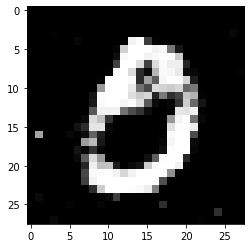

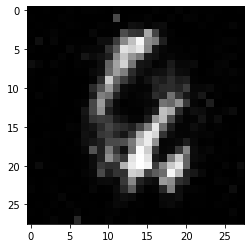

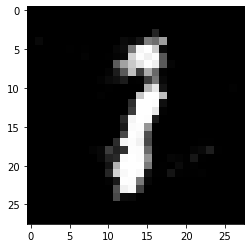

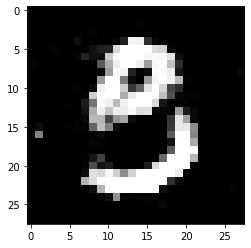

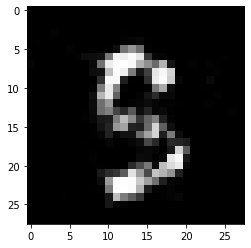

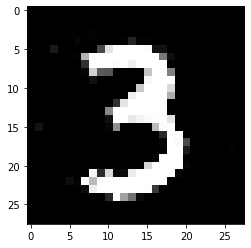

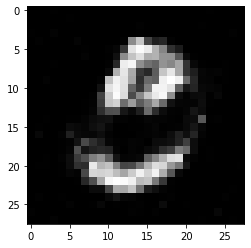

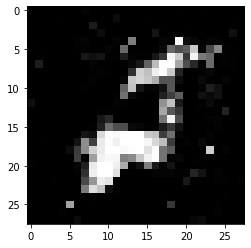

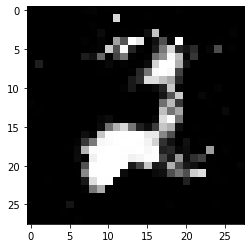

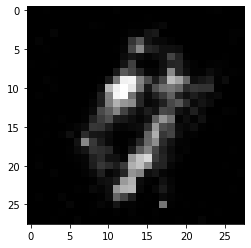

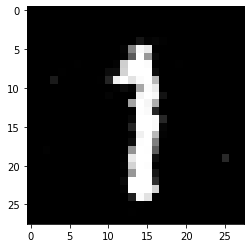

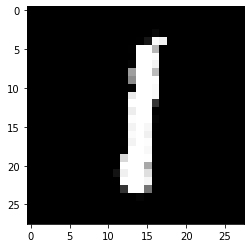

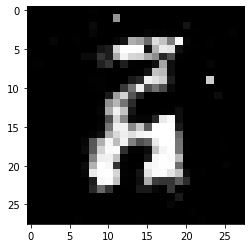

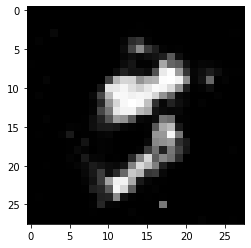

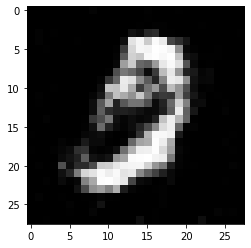

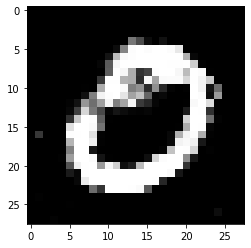

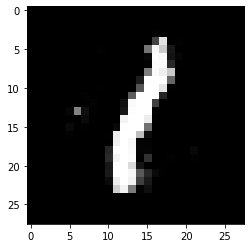

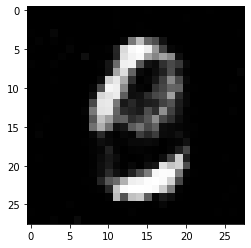

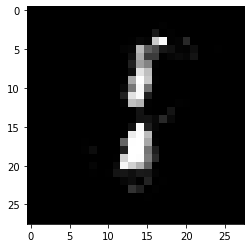

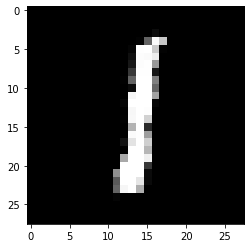

In [25]:
for i in range(previsao.shape[0]):
  plt.imshow(previsao[i, :].squeeze(), cmap='gray')
  plt.show()